In [14]:
import pandas as pd
import numpy as np

reviews = pd.read_csv("reviews.csv")

In [15]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6983,8985,2009-09-04,31133,Jeff,"Convenient location, clean apartment, great br..."
1,6983,9199,2009-09-07,11472,Andrea,We really enjoyed staying to Simon in our firs...
2,6983,11763,2009-09-28,35317,Jeanine,"Friendly host, save neighbourhood, clean appar..."
3,6983,20616,2009-12-17,53151,Sonja,"Simon is great! Fantastic place to stay, supe..."
4,6983,23168,2010-01-04,50856,James,"Great bed, clean apartment, comfy bed, accomod..."


## Ideas to explore

* Find relevant info per listing: Find all listing ID's: For each, count reviews, the the earliest review and its latest review.
* Reviewer ids. Do some drop many reviews?
* Can we do something with review comments?

## Info per listing

In [10]:
listing_ids = reviews['listing_id'].drop_duplicates().reset_index(drop = True)

In [17]:
reviews['date'] = reviews['date'].apply(lambda x: int(x[0:4]))
reviews['date'].head()

0    2009
1    2009
2    2009
3    2009
4    2010
Name: date, dtype: int64

In [23]:
df = reviews.loc[:,['listing_id','date']]

In [33]:
count = []
earliestYear = []
latestYear = []

for i in range(0,listing_ids.count()):
    r = df[df.listing_id == listing_ids[i]]
    count.append(r.count()[0])
    earliestYear.append(r.date.min())
    latestYear.append(r.date.max())

In [34]:
info_per_reviewed_listings = pd.DataFrame({'listing_id': listing_ids,
                                           'review_count': count,
                                           'earliestYear': earliestYear,
                                           'latestYear': latestYear})

In [35]:
info_per_reviewed_listings.head()

,listing_id,review_count,earliestYear,latestYear
0,6983,167,2009,2019
1,26057,43,2013,2018
2,26473,245,2010,2019
3,29118,20,2010,2018
4,29618,87,2010,2014


Hmm... let's calculate reviews per year, similar to reviews per month from listings summary. We'll be able to find the listings with most reviews and most frequent reviews.

In [45]:
freq = []
for i in range(0,listing_ids.count()):
    ## You need to plus by 1 to avoid division by zero,
    ## and also because both first and last year are inclusive.
    d = 1 + info_per_reviewed_listings.iloc[i,3] - info_per_reviewed_listings.iloc[i,2]
    freq.append(info_per_reviewed_listings.iloc[i,1] / d)

In [48]:
info_per_reviewed_listings['reviews_per_year'] = pd.Series(freq, index=listing_ids.index)

In [49]:
info_per_reviewed_listings.head()

,listing_id,review_count,earliestYear,latestYear,reviews_per_year
0,6983,167,2009,2019,15.181818
1,26057,43,2013,2018,7.166667
2,26473,245,2010,2019,24.500000
3,29118,20,2010,2018,2.222222
4,29618,87,2010,2014,17.400000


It's time to vizzle this shizzle.

In [51]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020597C46780>]],
      dtype=object)

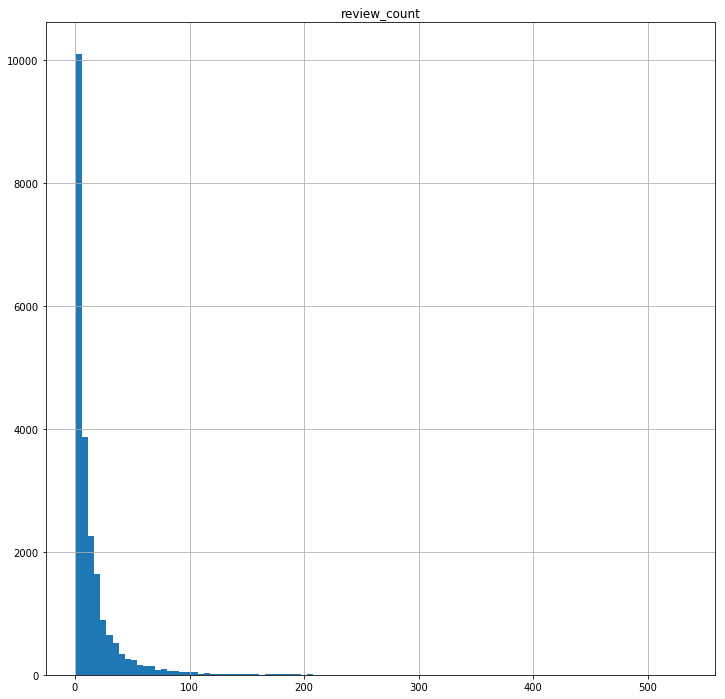

In [53]:
info_per_reviewed_listings.hist(column='review_count', bins=100,figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020597E4B1D0>]],
      dtype=object)

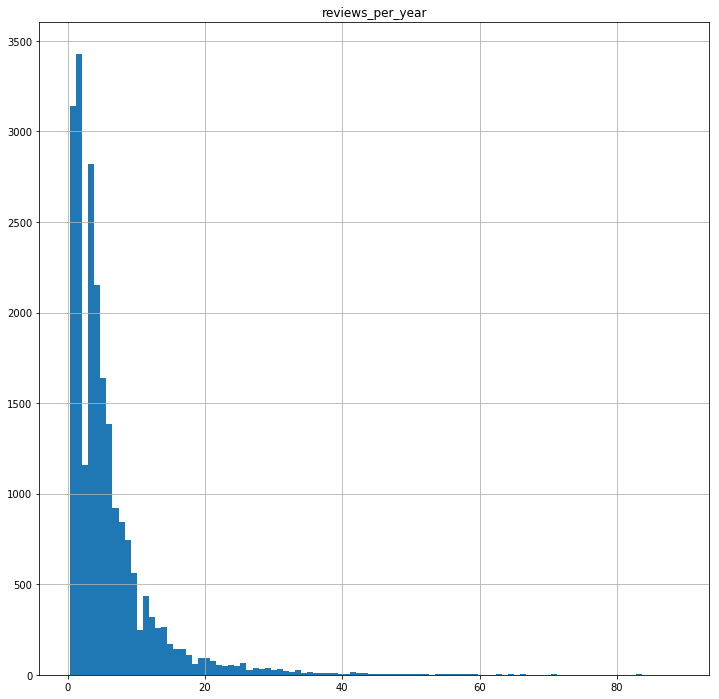

In [54]:
info_per_reviewed_listings.hist(column='reviews_per_year', bins=100,figsize=(12,12))

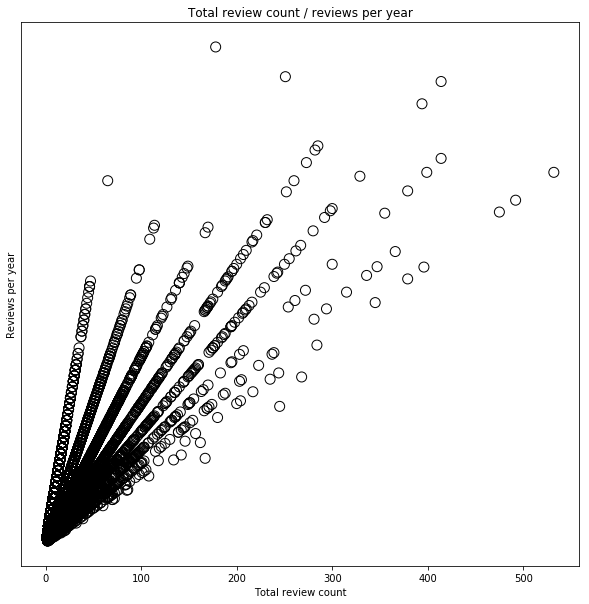

In [59]:
x = info_per_reviewed_listings['review_count']
y = info_per_reviewed_listings['reviews_per_year']

plt.figure(figsize=(10,10))
plt.scatter(x, y, s=100, facecolors='none', edgecolors='k')
plt.title("Total review count / reviews per year")
plt.yticks([],[])
plt.xlabel("Total review count")
plt.ylabel("Reviews per year")

plt.show()

I don't know how to interpret this scatter plot. Like, I don't get it.

You should know this by now, but I'll repeat: Points on the mid-lower right are listings with many total reviews, but are reviewed fairly infrequently (i.e., the long-runners). Points on the upper left corner are the newest listings with many reviews coming in frequently, but they have few reviews in total comparatively because they've only been active for a single year.

What's immediately obvious is that all plot points are results of linear regression. *I don't know why it is so, or why it must necessarily be so, but that's how it is.* Count all the lines and we'll find there a total of 10 linear regressions (the flattest ones to the lower right are fairly faint though).

I am guessing that each regression represents how many years a listing has been active. This makes sense, as reviews span from 2009 to 2019, a total of 11 years when inclusive. However, I know there are only 4 reviews from 2009, so it may as well be 10 years only in practice.

Think about it this way: Listings at the top left have a high review frequency, but low total number of reviews. In other words, the steepest lienar regression has only been active for a single year. Equally, the flattest linear regressions are barely visible, because very few listings have been on Airbnb from the start in 2009 and still going strong into 2019, so over a decade. But they do exist, and that's wild.

## Info per reviewer

Yeah, it's pretty much the same deal, same process and same programming, but this time I expect very little. Otherwise, we'd have some really frequent visitors living off on Airbnb, and they don't exist... right? *ahem*

In [60]:
reviewer_ids = reviews['reviewer_id'].drop_duplicates().reset_index(drop = True)

In [61]:
df = reviews.loc[:,['reviewer_id','date']]

In [63]:
count = []
earliestYear = []
latestYear = []

for i in range(0,reviewer_ids.count()):
    r = df[df.reviewer_id == reviewer_ids[i]]
    count.append(r.count()[0])
    earliestYear.append(r.date.min())
    latestYear.append(r.date.max())

In [64]:
reviewers_info = pd.DataFrame({'reviewer_id': reviewer_ids,
                               'reviews_done': count,
                               'earliestYear': earliestYear,
                               'latestYear': latestYear})

In [70]:
reviewers_info.sort_values('reviews_done').tail(10)

,reviewer_id,reviews_done,earliestYear,latestYear
48775,6604623,17,2017,2019
1025,838052,19,2012,2019
6092,19270652,20,2014,2018
24365,11604068,20,2016,2018
93927,114780841,21,2017,2019
199,4025202,24,2017,2019
31224,3356928,24,2014,2019
23066,44061416,25,2015,2017
14650,36254879,26,2016,2019
11948,47082496,32,2015,2019


As you can tell, I expected the vast majority of people to only do one or two reviews. But let's have a look.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020597FCD278>]],
      dtype=object)

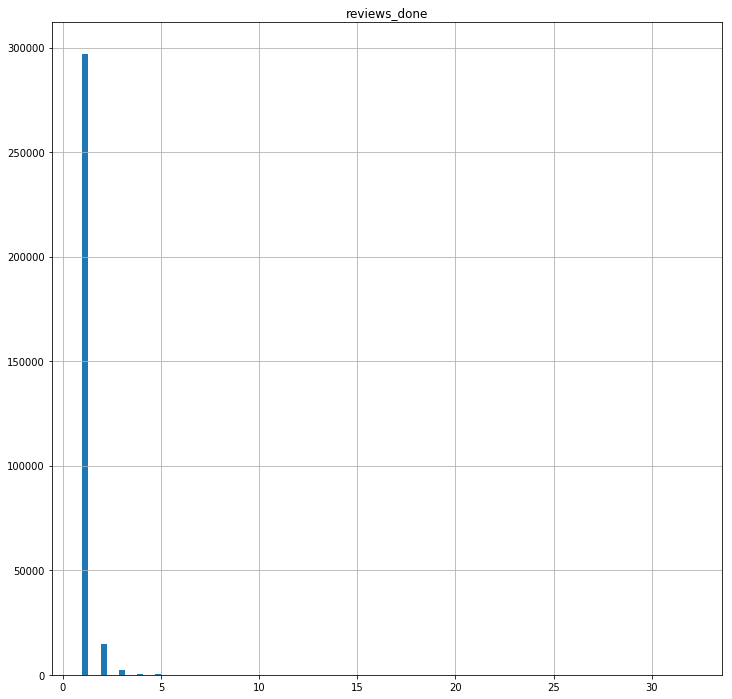

In [71]:
reviewers_info.hist(column='reviews_done', bins=100,figsize=(12,12))

Needless to say, the vast majority of reviewers only visited Copenhagen once. I'm assuming they're not using multiple accounts and all that jazz. Now, I wonder - what are the percentages?

In [147]:
reviewers_info.count()[0]

315030

In [146]:
reviewers_info.reviews_done.value_counts()

1     297124
2      14665
3       2079
4        605
5        240
6        113
7         64
8         32
9         32
10        23
12        15
11         9
13         8
14         5
15         3
16         3
20         2
24         2
26         1
17         1
19         1
21         1
25         1
32         1
Name: reviews_done, dtype: int64

In [148]:
297124/315030 * 100

94.31609687966225

So, less than 6% review twice.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205A24D9438>]],
      dtype=object)

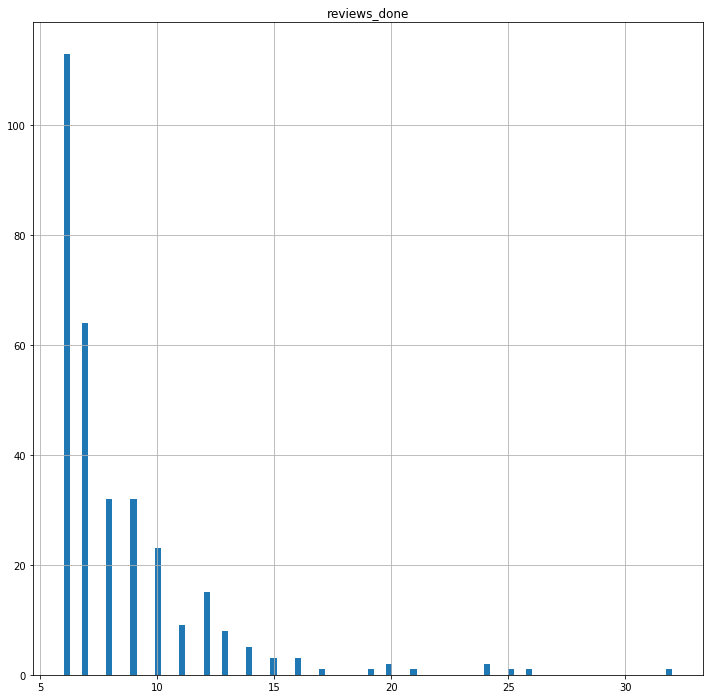

In [75]:
# And what's the distribution for those than left more than 5 reviews?
reviewers_info[reviewers_info.reviews_done > 5].hist(column='reviews_done', bins=100,figsize=(12,12))

Let's have a look at the top reviewers...

In [76]:
reviews[reviews.reviewer_id == 47082496]

,listing_id,id,date,reviewer_id,reviewer_name,comments
12110,537471,289916084,2018,47082496,Thomas,Truly great beds. Very central. Fast communica...
53095,2200398,132341128,2017,47082496,Thomas,Super communication and service\nminded host. ...
102834,5019399,51683661,2015,47082496,Thomas,"I only stayed for one night, and I even though..."
102851,5019399,68942097,2016,47082496,Thomas,This is the second time I stayed with Jens Jak...
102861,5019399,74087614,2016,47082496,Thomas,Third time I stayed here. That kind of says it...
102872,5019399,79083930,2016,47082496,Thomas,A pleasure as always.
102891,5019399,98896107,2016,47082496,Thomas,As always Jens Jakob is a great host.
102905,5019399,104707011,2016,47082496,Thomas,Super. I stay here everytime I'm in Copenhagen.
102915,5019399,110417230,2016,47082496,Thomas,Stayed there many times. Jakob is a super host.
102929,5019399,151179614,2017,47082496,Thomas,I've stayed here many times. Always a pleasure...


Turns out Thomas does visit Copenhagen a lot, but he's reviewed the same listing 27 times. I assume that the Airbnb service demands he reviews the place every time he visits - similar to Ûber. And as always, the reviews do get shorter when you're forced to review the same place over and over and over again.

In [77]:
reviews[reviews.reviewer_id == 36254879]

,listing_id,id,date,reviewer_id,reviewer_name,comments
14856,623404,162750531,2017,36254879,Asma,I ha a great stay at Irismar's place. The room...
14864,623404,188920156,2017,36254879,Asma,"It was my second time at Irismar place, and I ..."
14868,623404,200633943,2017,36254879,Asma,Irismar is a fantastic and very nice host:) It...
14870,623404,214229055,2017,36254879,Asma,Irismar is the best host ever :) the apartment...
14871,623404,228858860,2018,36254879,Asma,Irismar is a great host:) everything was perfe...
14873,623404,232215082,2018,36254879,Asma,I enjoyed my stay at Irismar's place. Very nic...
14874,623404,234273605,2018,36254879,Asma,"Superbe adresse:) L'appartement est genial, et..."
14876,623404,239837800,2018,36254879,Asma,C'est toujours un plaisir de loger chez Irisma...
14877,623404,243239094,2018,36254879,Asma,Merci Irismar pour ton hospitalité. Je recomma...
14880,623404,250784839,2018,36254879,Asma,Simply perfect :) I highly recommend


A bit more variety, but has stayed at the some places multiple times.

In [79]:
reviews[reviews.reviewer_id == 36254879].iloc[0,5].

"I ha a great stay at Irismar's place. The room is clean and nice as well as the apartment. Irismar is a great host shes is nice and very  welcoming. "

So those that do many reviews visit the same place over and over. I know it's a small sample size of only looking at the two top reviewers, but there aren't that many of them to begin with. They're the 6% that return.

### For fun: Negative reviews?

In [87]:
# Returns first review containing a string. Used to spot bad reviews.
def reviewContainsWord(s):
    for i in range(0, listing_ids.count()):
        if s in reviews.iloc[i,5]:
            return reviews.iloc[i,5]

In [93]:
reviewContainsWord("garbage")

"Perfect location right in the heart of the best part of the city. A close walk to everything. Oliver was great in getting us checked in. House was very nice. Nicely equipped, nice room for the 8 of us to gather / eat in.\r\nOnly problem is the street noise - there is a comedy club next door with a noisy queue and smokers (need to leave windows closed on that side if smoke bothers you), noisy bar across the street (festivities die down at about 4AM on Friday), and the garbage guys (who make a lot of noise) come at 6AM. Just need to be aware: that's the down-side. Otherwise great place"

In [94]:
reviewContainsWord("bad")

"Really charming apartment right in the centre of Copenhagen, with enough space for 12 people. Lovely old building in a quiet courtyard. The kitchen could be slightly better equipped though the basics are there. \r\n\r\nA deposit was taken from my account the day before our rental period despite being told by Oliver that there would be no deposit, which was a big unexpected problem. Rob was able to sort this out quite quickly, but the rental company were slow to respond to some other emails and didn't provide location details etc until the day before the trip, and only after being prompted. \r\n\r\nOverall, great apartment but some fairly bad administration problems."

In [96]:
reviewContainsWord("terrible")

"We would have loved to review the apartment that we actually booked, but are not able to... because we did not end up staying in this apt. We booked this apartment MONTHS in advance because it looked beautiful and would fit our group of 6. TWO days before we were heading to Europe for our trip (a week before our reservation), we received a private message/phone call (not through Air BNB) informing us our apt. would not be available and they had a replacement apt.for us. At that point, we were leaving the country in two days and didn't have the time to find a replacement with such short notice. It was either take this deal or have no where to stay. They did give us around $300 USD for our inconvenience, but that in no way makes up for the difference in the apartment we booked vs. the apartment we ended up with. Even with the $300, I guarantee we paid WELL over the value of this place. We had to arrive near our original apt. to meet the host and then drag out luggage across the city. Wh

In [107]:
reviewContainsWord("dangerous")

"We arrived at this Copenhagen apartment at the much-appreciated and agreed-upon early arrival of 12:15, at which time we understood that we were going to be able to drop our bags while the apartment was being cleaned. (The previous renter was not out until noon that day.) The building was under construction and was completely wrapped in scaffolding and plastic, making it impossible to recognize it from the exterior pictures provided in the app. After sorting out the location and a slight mix-up in communication with Christian and Carl, we were finally able to get our bags into the apartment at 13:15, which was still earlier than the listed time. Lucky for us it was a warm day and there was a pleasant, sunny little plaza in which we could wait right behind the building. It turned out that by the time we got in, Carl had the space ready. He got us all set up and we were on our way to three days in that truly amazing city. This apartment has great potential and is a good value with its b

I'm really trying to find the spicy reviews, but they just aren't there. Tried a bunch of other words but found no results.

I don't know man. People are just too nice on this platform. I was hoping for some straight fire, just flaming and roasting their hosts.

## Yearly distribution of reviews

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002059A1B8048>]],
      dtype=object)

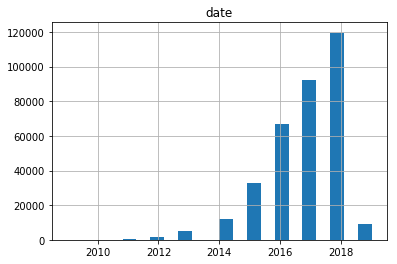

In [118]:
reviews.hist(column='date', bins=22)

I think this showns the development of Airbnb pretty clearly. It looks like Airbnb's business in Copenhagen doubled each year until 2016.

As of today's writing in May 2019, the low value for 2019 is because 1) the year isn't over, duh, and 2) our data covers up until 17th of February 2019, so 1½ months.

January/February are probably not high season, but if we make a distribution of January's year-to-year development, then perhaps we can compare the growth?

In [119]:
reviews = pd.read_csv("reviews.csv")

In [123]:
yearMonths = reviews['date'].apply(lambda x: x[0:7])
yearMonths.head()

0    2009-09
1    2009-09
2    2009-09
3    2009-12
4    2010-01
Name: date, dtype: object

In [131]:
l = []
for i in range (0, yearMonths.count()):
    if (yearMonths[i][5:7] == '01'):
        l.append(int(yearMonths[i][0:4]))

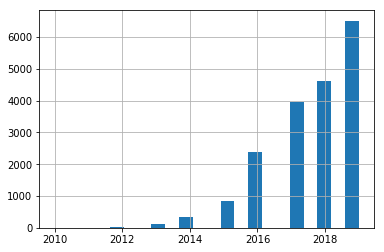

In [133]:
l = pd.Series(l)
l.hist(bins=22)

Would you look at that! Looks like 2019 is gonna be another great year for Airbnb in Copenhagen and the growth ain't slowing down. How much higher 2019 compared to 2018?

In [134]:
l.value_counts()

2019    6511
2018    4610
2017    3947
2016    2390
2015     846
2014     331
2013     127
2012      35
2011       5
2010       1
dtype: int64

In [141]:
# From 2017 to 2018:
(4610-3947) / 3947 * 100

16.797567772992146

In [142]:
# From 2018 to 2019:
(6511-4610)/4610 * 100

41.23644251626898

Looks like a 41% growth. Then let's take the yearly distribution of reviews, multiply with the percentage, and predict how many reviews we'll get in 2019 total.

In [137]:
reviews.date.value_counts()

2018-08    17636
2017-08    14417
2018-07    14111
2018-05    13984
2018-06    13134
2018-09    12726
2017-07    11442
2017-06    10315
2016-08    10187
2017-05     9832
2017-09     9678
2016-07     9324
2018-10     8885
2018-04     8505
2018-12     8029
2018-11     7567
2016-09     7146
2016-05     7071
2017-04     6898
2017-10     6859
2016-06     6526
2019-01     6511
2016-10     6117
2018-03     6062
2015-08     5604
2017-12     5374
2017-11     4963
2018-01     4610
2017-03     4461
2018-02     4304
           ...  
2012-12      108
2013-02       88
2012-04       70
2011-08       66
2011-11       48
2011-09       46
2012-01       35
2012-03       35
2011-07       33
2011-12       30
2011-06       29
2012-02       29
2011-10       23
2011-05       19
2011-04       14
2010-08       13
2010-12        5
2010-07        5
2010-06        5
2011-03        5
2011-01        5
2010-09        4
2011-02        3
2009-09        3
2010-11        3
2010-10        3
2010-05        1
2010-04       

Accidentally got the wrong output, but this one's pretty interesting too. Looks like autumn and summer months are most popular. You have to reach down a bit before getting to the first January, which as we already know, is 2019.

In [138]:
reviews['date'] = reviews['date'].apply(lambda x: int(x[0:4]))

In [139]:
reviews.date.value_counts()

2018    119553
2017     92121
2016     66663
2015     32706
2014     12182
2019      9093
2013      4802
2012      1499
2011       321
2010        41
2009         4
Name: date, dtype: int64

In [143]:
# Just curious, what's the total yearly increase from 2017 to 2018?
(119553-92121)/92121 * 100

29.77822646302146

January's review increment between 2017-2018 in percentages is 17%, while the total review increment between 2017-2018 is 30%. The disparity makes sense, as summer and autumn months are high season, as I (accidentally) output earlier. January's increase is slower than the summer/autumn months, and also compared to the entire year.

In [145]:
119553 * 1.41

168569.72999999998

Still, the 41% increase from 2018-2019 is incredibly high compared to the measly 17% from 2017-2018. And for the whole year, the increase may be even higher than 41%, if the pattern from 2017-2018 repeats. It's a bold guess, since 41% is a lot of growth. So no promises - and I should note, I've only looked at three years total, I haven't compared in between every year.

Anyway, if we use 41% increase, the prediction is we'll have about 168.000 reviews total throughout all of 2019, compared to 2018's 120.000 reviews.

### Exports

Oh, they're pretty important too. Let's dump the data frames.

In [151]:
info_per_reviewed_listings.to_csv("info_per_reviewed_listings.csv")

In [152]:
reviewers_info.to_csv("reviewers_info.csv")